#

## IMPORTS & LOAD DATA

### Imports

In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (10,6)

### Charger les données

In [36]:
df = pd.read_csv("../data/raw/retail_customers_COMPLETE_CATEGORICAL.csv")

df.head()

,CustomerID,Recency,Frequency,MonetaryTotal,MonetaryAvg,MonetaryStd,MonetaryMin,MonetaryMax,TotalQuantity,AvgQuantityPerTransaction,...,Region,LoyaltyLevel,ChurnRiskCategory,WeekendPreference,BasketSizeCategory,ProductDiversity,Gender,AccountStatus,Country,Churn
0,17850,302,35,5288.63,16.950737,13.603662,-30.60,107.25,1693,5.426282,...,UK,Jeune,Critique,Inconnu,Moyen,Explorateur,Unknown,Active,United Kingdom,1
1,13047,32,18,3079.10,15.709694,11.684769,-15.00,68.00,1355,6.913265,...,UK,Établi,Moyen,Semaine,Moyen,Explorateur,M,Active,United Kingdom,0
2,12583,3,18,7187.34,28.634821,23.150132,-60.84,132.80,5009,19.956175,...,Europe continentale,Ancien,Faible,Semaine,Grand,Explorateur,Unknown,Active,France,0
3,13748,96,5,948.25,33.866071,42.953119,9.36,204.00,439,15.678571,...,UK,Établi,Critique,Inconnu,Grand,Explorateur,Unknown,Active,United Kingdom,1
4,15100,330,6,635.10,105.850000,215.986263,-131.40,350.40,58,9.666667,...,UK,Jeune,Critique,Inconnu,Moyen,Spécialisé,M,Active,United Kingdom,1


## ANALYSE STRUCTURE

### Informations générales

In [37]:
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 4372 entries, 0 to 4371
Data columns (total 52 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   CustomerID                 4372 non-null   int64  
 1   Recency                    4372 non-null   int64  
 2   Frequency                  4372 non-null   int64  
 3   MonetaryTotal              4372 non-null   float64
 4   MonetaryAvg                4372 non-null   float64
 5   MonetaryStd                4372 non-null   float64
 6   MonetaryMin                4372 non-null   float64
 7   MonetaryMax                4372 non-null   float64
 8   TotalQuantity              4372 non-null   int64  
 9   AvgQuantityPerTransaction  4372 non-null   float64
 10  MinQuantity                4372 non-null   int64  
 11  MaxQuantity                4372 non-null   int64  
 12  CustomerTenureDays         4372 non-null   int64  
 13  FirstPurchaseDaysAgo       4372 non-null   int64  
 14  Pre

### Statistiques descriptives

In [38]:
df.describe()

,CustomerID,Recency,Frequency,MonetaryTotal,MonetaryAvg,MonetaryStd,MonetaryMin,MonetaryMax,TotalQuantity,AvgQuantityPerTransaction,...,ZeroPriceCount,CancelledTransactions,ReturnRatio,TotalTransactions,UniqueInvoices,AvgLinesPerInvoice,Age,SupportTicketsCount,SatisfactionScore,Churn
count,4372.000000,4372.000000,4372.000000,4372.000000,4372.000000,4372.000000,4372.000000,4372.000000,4372.000000,4372.000000,...,4372.000000,4372.000000,4372.000000,4372.000000,4372.000000,4372.000000,3061.000000,4372.000000,4372.000000,4372.000000
mean,15299.677722,92.047118,5.075480,1898.459701,28.839013,88.672383,-86.425754,185.179522,1122.344007,22.389288,...,0.009149,2.036825,0.032045,93.053294,5.075480,19.883969,49.149951,21.778591,5.328225,0.332571
std,1722.390705,100.765435,9.338754,8219.345141,127.323926,2689.001161,2876.398935,2881.283699,4672.790720,213.257466,...,0.126218,7.340449,0.107003,232.471608,9.338754,18.512016,18.267835,139.267307,15.410883,0.471188
min,12346.000000,1.000000,1.000000,-4287.630000,-4287.630000,0.000000,-168469.600000,-4287.630000,-303.000000,-144.000000,...,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,18.000000,-1.000000,-1.000000,0.000000
25%,13812.750000,17.000000,1.000000,293.362500,10.985960,6.226414,-11.500000,31.800000,153.000000,5.475745,...,0.000000,0.000000,0.000000,17.000000,1.000000,8.000000,34.000000,1.000000,2.000000,0.000000
50%,15300.500000,50.000000,3.000000,648.075000,16.918616,10.349780,0.790000,52.020000,365.000000,9.494392,...,0.000000,0.000000,0.000000,42.000000,3.000000,14.600000,49.000000,2.000000,3.000000,0.000000
75%,16778.250000,143.000000,5.000000,1611.725000,23.542941,20.629858,6.960000,102.000000,962.250000,14.008333,...,0.000000,1.000000,0.021009,102.000000,5.000000,25.212500,65.000000,3.000000,4.000000,1.000000
max,18287.000000,374.000000,248.000000,279489.020000,3861.000000,137554.852393,3861.000000,168469.600000,196719.000000,12540.000000,...,4.000000,226.000000,1.000000,7983.000000,248.000000,219.000000,80.000000,999.000000,99.000000,1.000000


### Valeurs manquantes

In [39]:
df.isnull().sum().sort_values(ascending=False)

Age                          1311
AvgDaysBetweenPurchases        79
Frequency                       0
CustomerID                      0
MonetaryTotal                   0
MonetaryAvg                     0
MonetaryMin                     0
MonetaryStd                     0
TotalQuantity                   0
AvgQuantityPerTransaction       0
MinQuantity                     0
MonetaryMax                     0
MaxQuantity                     0
CustomerTenureDays              0
PreferredDayOfWeek              0
FirstPurchaseDaysAgo            0
PreferredHour                   0
PreferredMonth                  0
WeekendPurchaseRatio            0
Recency                         0
UniqueProducts                  0
UniqueDescriptions              0
UniqueCountries                 0
AvgProductsPerTransaction       0
ZeroPriceCount                  0
CancelledTransactions           0
ReturnRatio                     0
NegativeQuantityCount           0
TotalTransactions               0
UniqueInvoices

## ANALYSE DÉSÉQUILIBRE CHURN

### Distribution Churn

In [40]:
churn_dist = df["Churn"].value_counts()
churn_ratio = df["Churn"].value_counts(normalize=True)

print("Distribution brute:")
print(churn_dist)

print("\nDistribution normalisée:")
print(churn_ratio)

Distribution brute:
Churn
0    2918
1    1454
Name: count, dtype: int64

Distribution normalisée:
Churn
0    0.667429
1    0.332571
Name: proportion, dtype: float64


### Visualisation Churn

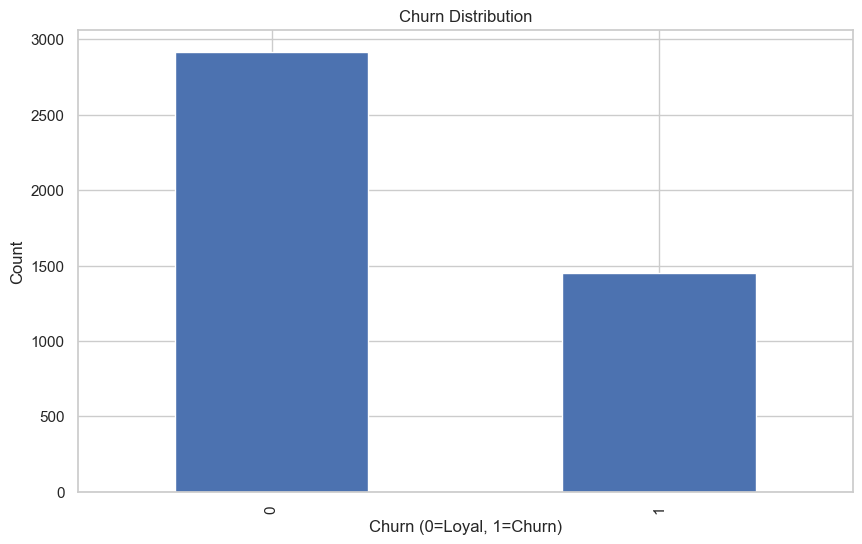

In [41]:
plt.figure()
df["Churn"].value_counts().plot(kind="bar")
plt.title("Churn Distribution")
plt.xlabel("Churn (0=Loyal, 1=Churn)")
plt.ylabel("Count")
plt.show()

## HEATMAP CORRÉLATION

### HEATMAP CORRÉLATION

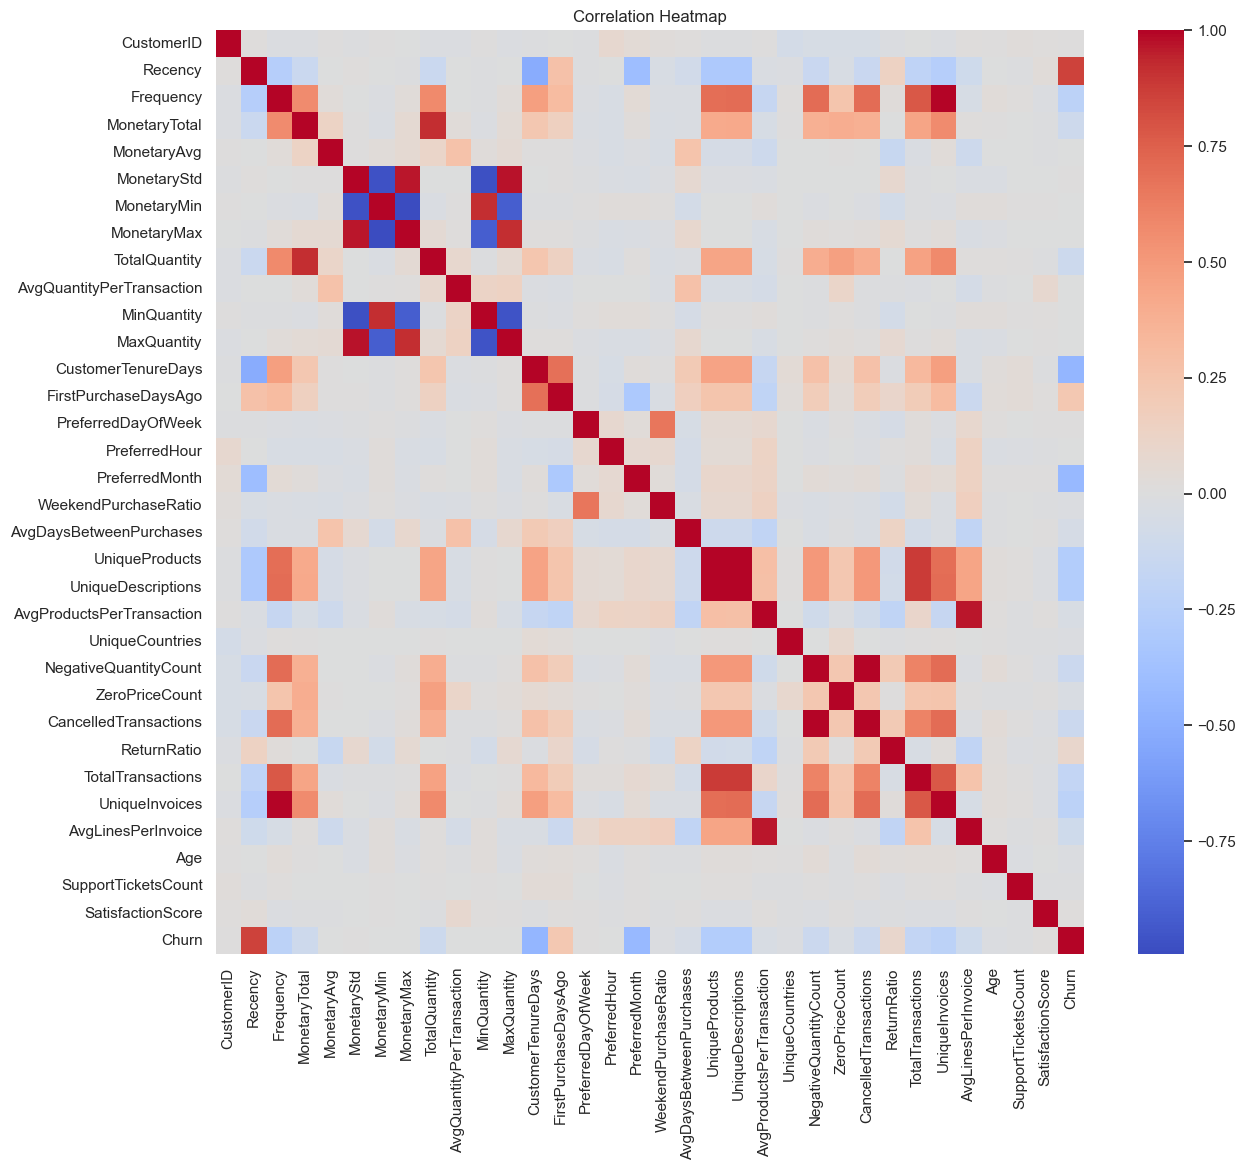

In [42]:
numeric_df = df.select_dtypes(include=["int64", "float64"])

plt.figure(figsize=(14,12))
sns.heatmap(numeric_df.corr(), cmap="coolwarm", center=0)
plt.title("Correlation Heatmap")
plt.show()

### Détection multicolinéarité (> 0.8)

In [43]:
corr_matrix = numeric_df.corr().abs()

upper = corr_matrix.where(
    np.triu(np.ones(corr_matrix.shape), k=1).astype(bool)
)

high_corr = [column for column in upper.columns if any(upper[column] > 0.8)]

# ⚠ On retire Churn si présent (on ne supprime jamais la target)
if "Churn" in high_corr:
    high_corr.remove("Churn")

print("Highly correlated features (>0.8):")
print(high_corr)

Highly correlated features (>0.8):
['MonetaryMin', 'MonetaryMax', 'TotalQuantity', 'MinQuantity', 'MaxQuantity', 'UniqueDescriptions', 'CancelledTransactions', 'TotalTransactions', 'UniqueInvoices', 'AvgLinesPerInvoice']


### Suppression colonnes corrélées

In [44]:
df_reduced = df.drop(columns=high_corr)

print("Original shape:", df.shape)
print("Reduced shape:", df_reduced.shape)

Original shape: (4372, 52)
Reduced shape: (4372, 42)


## ANALYSE VALEURS ABERRANTES

### Boxplot SupportTickets

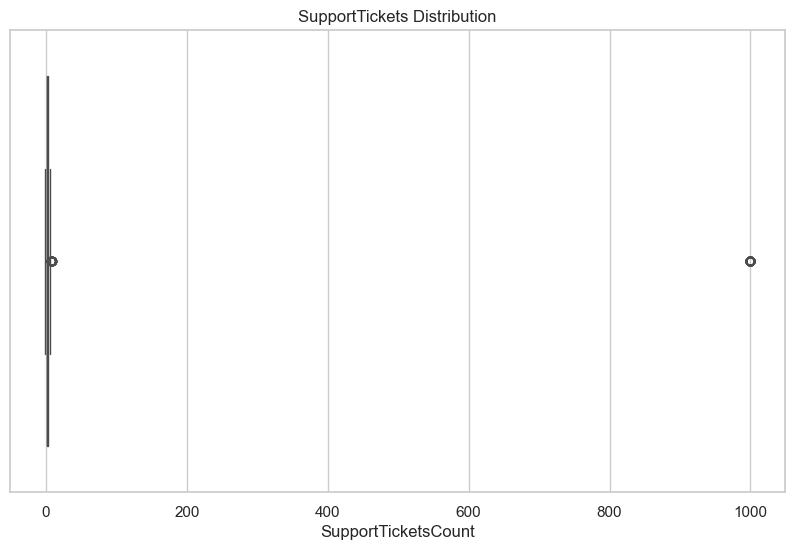

In [45]:
plt.figure()
sns.boxplot(x=df["SupportTicketsCount"])
plt.title("SupportTickets Distribution")
plt.show()

### Boxplot Satisfaction

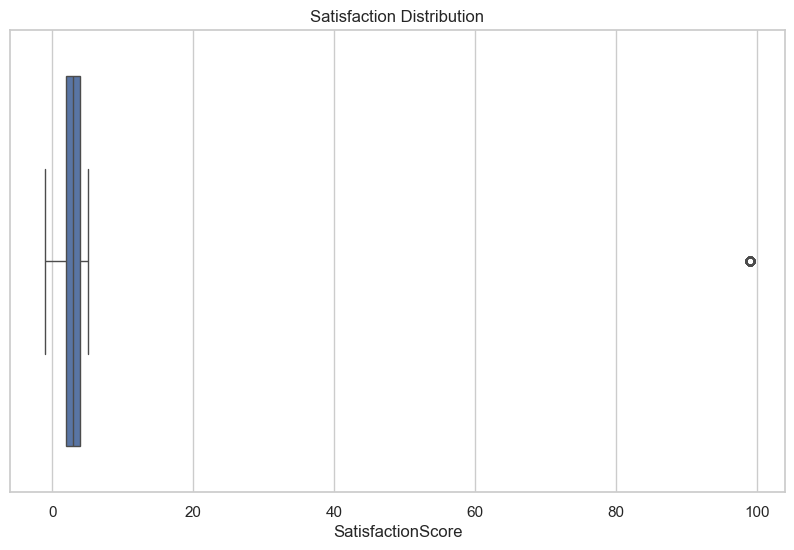

In [46]:
plt.figure()
sns.boxplot(x=df["SatisfactionScore"])
plt.title("Satisfaction Distribution")
plt.show()

## CORRECTION VALEURS ABERRANTES

### Remplacement valeurs invalides

In [48]:
df["SupportTicketsCount"] = df["SupportTicketsCount"].replace([-1, 999], np.nan)
df["SatisfactionScore"] = df["SatisfactionScore"].replace([-1, 99], np.nan)

### Vérification après correction

In [49]:
print("SupportTicketsCount invalid count:",
      df["SupportTicketsCount"].isin([-1,999]).sum())

print("Satisfaction invalid count:",
      df["SatisfactionScore"].isin([-1,99]).sum())

df[["SupportTicketsCount","SatisfactionScore"]].describe()

SupportTicketsCount invalid count: 0
Satisfaction invalid count: 0


,SupportTicketsCount,SatisfactionScore
count,4242.000000,4143.000000
mean,1.967468,2.926382
std,1.402116,1.498796
min,0.000000,0.000000
25%,1.000000,2.000000
50%,2.000000,3.000000
75%,3.000000,4.000000
max,9.000000,5.000000


## Imputation exploratoire

### Imputation médiane (EDA seulement)

In [ ]:
df["SupportTicketsCount"].fillna(df["SupportTicketsCount"].median(), inplace=True)
df["SatisfactionScore"].fillna(df["SatisfactionScore"].median(), inplace=True)

df[["SupportTickets","SatisfactionScore"]].describe()

KeyError: 'SupportTickets'

## Résumé Exploration

### Résumé automatique

In [ ]:
print("Dataset shape:", df.shape)
print("Total missing values:", df.isnull().sum().sum())
print("Number of duplicated rows:", df.duplicated().sum())

In [ ]:
print(df.columns.tolist())

['CustomerID', 'Recency', 'Frequency', 'MonetaryTotal', 'MonetaryAvg', 'MonetaryStd', 'MonetaryMin', 'MonetaryMax', 'TotalQuantity', 'AvgQuantityPerTransaction', 'MinQuantity', 'MaxQuantity', 'CustomerTenureDays', 'FirstPurchaseDaysAgo', 'PreferredDayOfWeek', 'PreferredHour', 'PreferredMonth', 'WeekendPurchaseRatio', 'AvgDaysBetweenPurchases', 'UniqueProducts', 'UniqueDescriptions', 'AvgProductsPerTransaction', 'UniqueCountries', 'NegativeQuantityCount', 'ZeroPriceCount', 'CancelledTransactions', 'ReturnRatio', 'TotalTransactions', 'UniqueInvoices', 'AvgLinesPerInvoice', 'Age', 'RegistrationDate', 'NewsletterSubscribed', 'LastLoginIP', 'SupportTicketsCount', 'SatisfactionScore', 'RFMSegment', 'AgeCategory', 'SpendingCategory', 'CustomerType', 'FavoriteSeason', 'PreferredTimeOfDay', 'Region', 'LoyaltyLevel', 'ChurnRiskCategory', 'WeekendPreference', 'BasketSizeCategory', 'ProductDiversity', 'Gender', 'AccountStatus', 'Country', 'Churn']
